# **E9 241: Digital Image Processing, Assignment 2**

**Kartikeyan Iyer (SR No. 25922)**

## 1. Spatial Filtering and Binarization

Apply box blurring on the image `moon_noisy.png`. Generate a spatial box filter of size 
$m\times m$  by generating a filter kernel as:

$$
B_f (x,y) = \frac{1}{K}
$$

where $x,y \in \{-\frac{m-1}{2}, ... , \frac{m-1}{2}\}$ and $K$ normalizes the filter such that
$\sum_x\sum_y B_f(x,y) = 1$. 



In [1]:
%load_ext autoreload
%autoreload 2

### 1.1. Load image

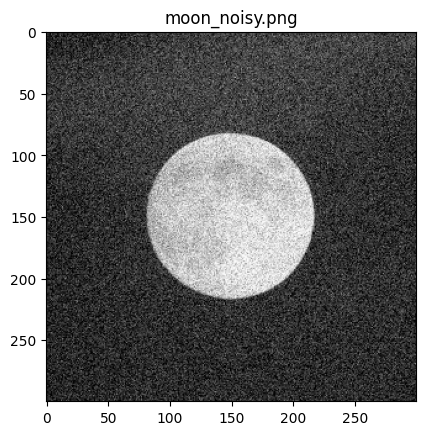

(300, 300)


In [2]:
from assn2.image import load_image, display_image

file= './images/moon_noisy.png'
image= load_image(file, grayscale=True)
display_image(image, title='moon_noisy.png')
print(image.shape)

### 1.2 Apply Box filter to the image

**WARNING!!**
- Don't run this cell. The preceise reason for `./results/` folder is to store the results of this cell only!
- The calculations of this cell take alot of space and it's for that preceise reason that that it's better
not to run this multiple times.
- This will take around 10 mins to run on a good gaming laptop!

**YOU'VE BEEN WARNED!**

In [5]:
from assn2.filter import box_filter
import cv2

m=[5,29,129]

for n in m:
    f= box_filter(n)
    mod_image= f.apply(image)
    cv2.imwrite(f'./results/moon_noisy_boxblur-{n}.png', mod_image)


#### 1.2.1 Loading the results

In [7]:
from assn2.image import load_image
import os

m=[5,29,129]
files=sorted(os.listdir('./results'), reverse=True)
images=[load_image('./results/'+file, grayscale=True) for file in files]

In [8]:
print(files)

['moon_noisy_boxblur-5.png', 'moon_noisy_boxblur-29.png', 'moon_noisy_boxblur-129.png']


#### 1.2.2 Histogram + Binarization 

In [9]:
from assn2.binarize import otsu_between_class, otsu_within_class, binarize
from assn2.histogram import histogram
import numpy as np

# list of (var_b array, min index)
thresholds= [otsu_within_class(img) for img in images]

# list of histograms
hist_blr= [histogram(img, normalized=True) for img in images]

# list of within class variances
vars_w= [t[0][t[1]] for t in thresholds]

# list of binary images
bin_imgs= [binarize(image, t[1]) for t in thresholds]

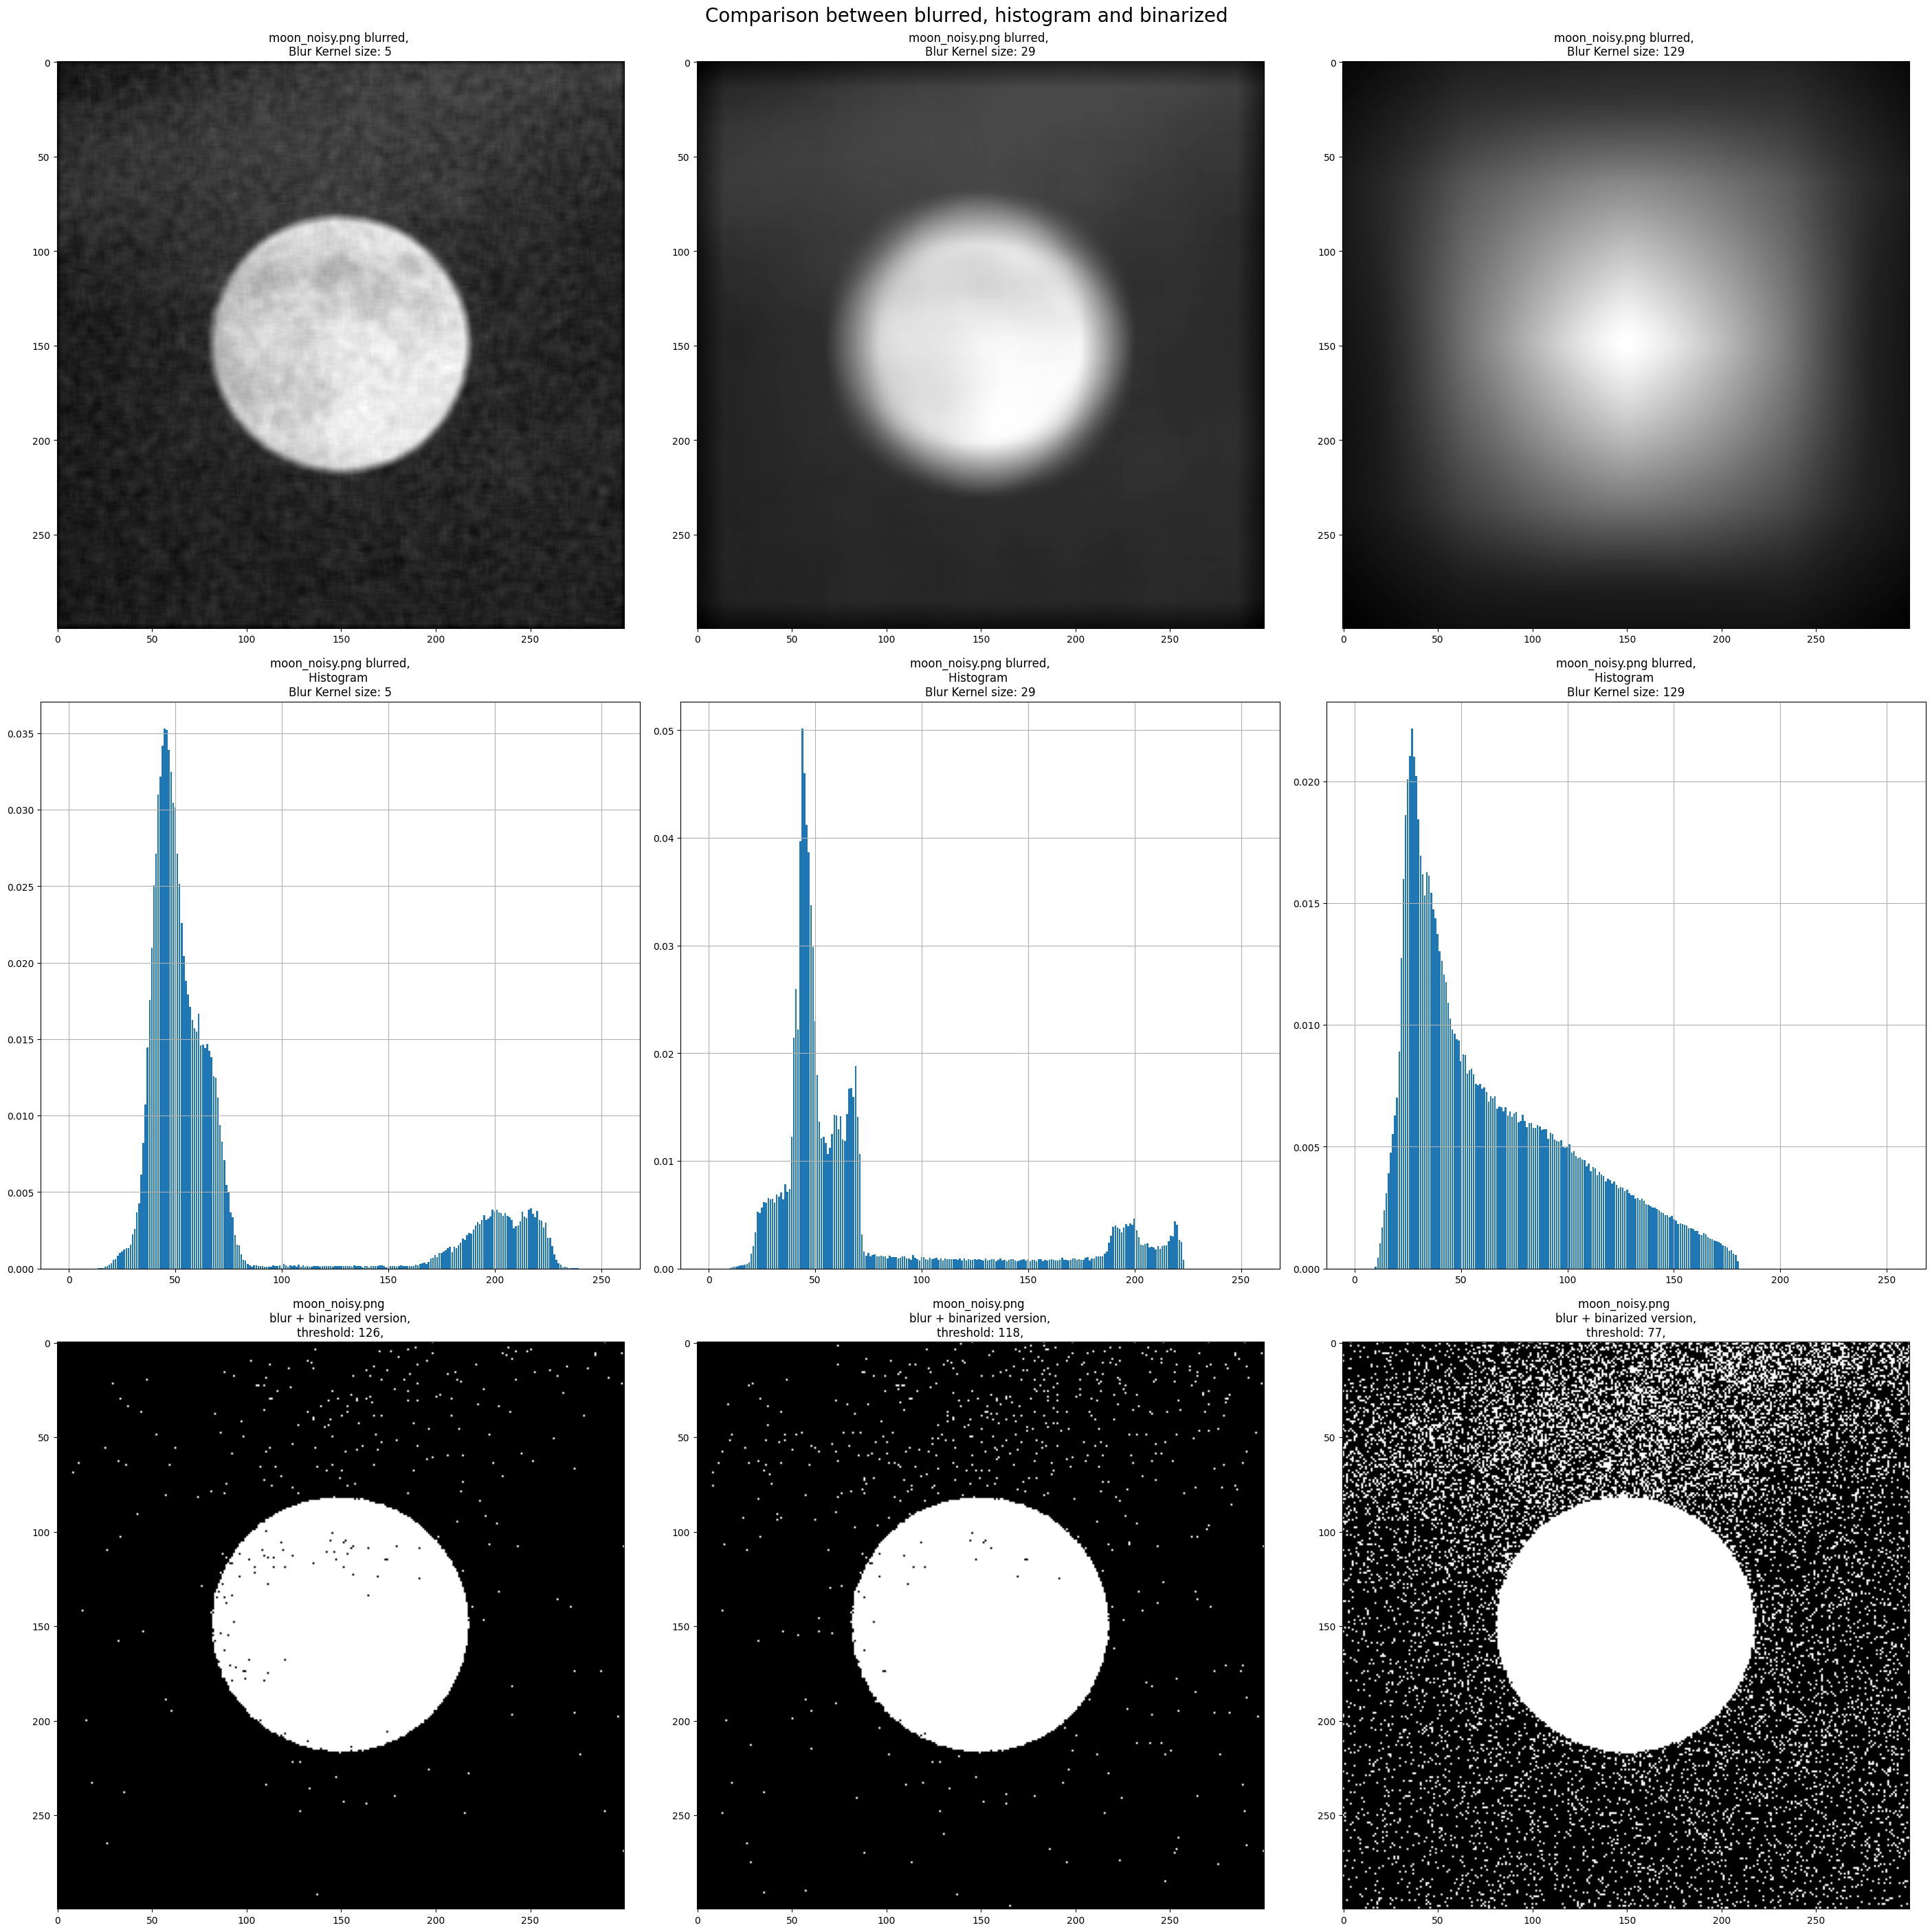

In [14]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots(nrows=3, ncols=3, figsize=(28,28), constrained_layout=True)
fig.suptitle('Comparison between blurred, histogram and binarized', fontsize=20)

for i in range(len(images)):
    ax[0,i].imshow(images[i], cmap='gray')
    ax[0,i].set_title(f'moon_noisy.png blurred, \nBlur Kernel size: {m[i]}')

for i in range(len(images)):
    ax[1,i].bar(np.arange(len(hist_blr[i])), hist_blr[i])
    ax[1,i].set_title(f'moon_noisy.png blurred,\nHistogram \nBlur Kernel size: {m[i]}')
    ax[1,i].grid(True)

for i in range(len(bin_imgs)):
    ax[2,i].imshow(bin_imgs[i], cmap='gray')
    ax[2,i].set_title(f'moon_noisy.png \nblur + binarized version,\nthreshold: {thresholds[i][1]},')

plt.show()

**Observations**:
1. Clearly visible that higher the kernel size, more the indistinguishable the moon is from the background.
2. Higher size blur kernels remove the sharp edges completely.
3. The histogram becomes more interspersed rather than split the lighter and darker parts

In [ ]:
print(f'Variances: {vars_w}')
print(f'Minumum Variance:{np.min(vars_w):.4f}')
print(f'Corresponding block size: {m[np.argmin(vars_w)]}')

Variances: [np.float64(176.67605658653503), np.float64(335.69654820005394), np.float64(404.3348002619216)]
Minumum Variance: 176.67605658653503
Corresponding block size: 5


## 2. Scaling and Rotation with Interpolation

In [1]:
%load_ext autoreload
%autoreload 2

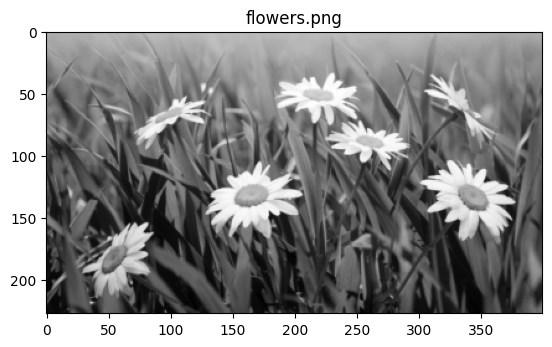

Image dimensions (height, width) = (227, 400)


In [12]:
from assn2.image import load_image, display_image

file= './images/flowers.png'
image= load_image(file, grayscale=True)
display_image(image, 'flowers.png')
print(f'Image dimensions (height, width) = {image.shape}')

### 2.1. Upsample (2x, Bilerp) + Rotate ($45^\circ$)

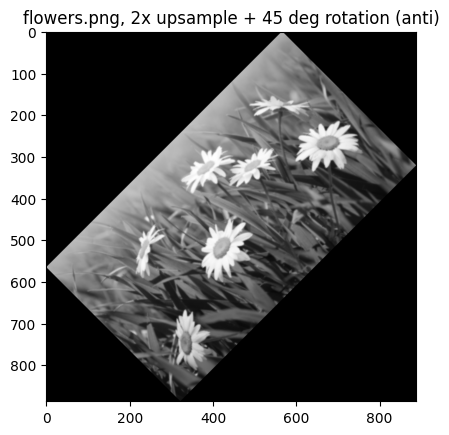

Image dimensions (height, width) = (887, 887)


True

In [28]:
from assn2.transforms import zoom, rotate
import cv2

Z= zoom()
R= rotate()

mod_image1= R(Z(image, (2,2)), 45)
display_image(mod_image1, title='flowers.png, 2x upsample + 45 deg rotation (anti)')
print(f'Image dimensions (height, width) = {mod_image1.shape}')
cv2.imwrite('./results/flowers_upsample-rotate.png', mod_image1)

### 2.2 Rotate then upsample

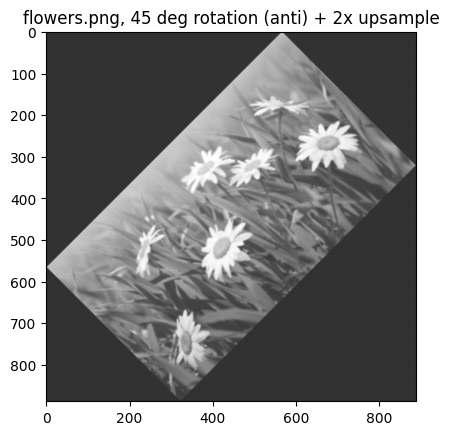

Image dimensions (height, width) = (888, 888)


True

In [29]:
from assn2.transforms import zoom, rotate
import cv2

Z= zoom()
R= rotate()

mod_image2= Z(R(image, 45), (2,2))
display_image(mod_image2, title='flowers.png, 45 deg rotation (anti) + 2x upsample')
print(f'Image dimensions (height, width) = {mod_image2.shape}')
cv2.imwrite('./results/flowers_rotate-upsample.png', mod_image2)

### 2.3 Comparison 

for comparison, we'll pad the smaller image on the bottom and right.

In [ ]:
import cv2

mod_image1= cv2.resize(mod_image1, mod_image2.shape)
print(mod_image1.shape)

(888, 888)


min, max and avg of diff = -31.8815, 113.8857, 0.2414


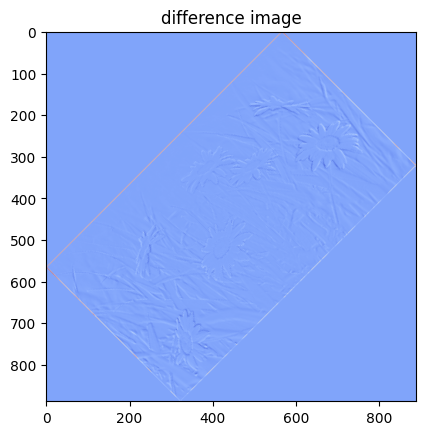

In [ ]:
import numpy as np

diff= mod_image1 - mod_image2
print(f'min, max and avg of diff = {np.min(diff):.4f}, {np.max(diff):.4f}, {np.mean(diff):.4f}')
display_image(diff, 'difference image', cmap='coolwarm')

We see that although there are some extremes here and there, but the main thing is most of the pixels in the difference fall into the average value only, which is **0.2414**.

The problem is with the rotation operation:

1. Upsample + Rotate: When you upsample first, then you interpolation algo uses info inside the image and hence less blur happens. Rotating it afterward hence appears more clearer since not many imperfections or information loss present.

2. Rotate + Upsample: Rotating LR image introduces alot of imperfections due to interpolating from a sparse set of pixels compared to before. Now if you upsample an already imperfect image, it just adds on to the mess.

**Rule of Thumb**: Upsample first, then other ops

## 3. Image Sharpening Concept

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


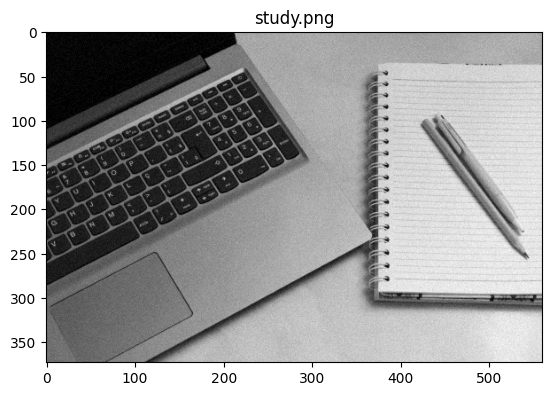

Image dimensions (H,W): (373, 560)


In [48]:
from assn2.image import load_image, display_image

image_name= 'study.png'
file= f'./images/{image_name}'
image= load_image(file, grayscale= True).astype(np.float64)
display_image(image, title= f'{image_name}')
print(f'Image dimensions (H,W): {image.shape}')

### 3.1 Unsharp Masking

In this unsharp masking, the procedure is as follows:
1. Get a blurred version of this image (Gaussian Blur for this case)
2. $I_{sharp} = I_{original} + p\cdot(I_{original}-I_{blurred})$

$p$ is a parameter here that varies b/w 0 to 1. 0 will leave the image unchanged and 1 will strongly sharpen the image

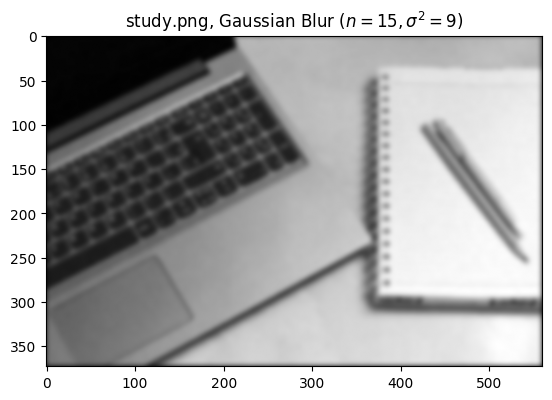

In [62]:
from assn2.filter import gaussian_filter

G= gaussian_filter(15, 9)
filtered_image= G(image)
display_image(filtered_image.squeeze(), f'study.png, Gaussian Blur ($n={G.window.kernel.shape[0]}, \sigma^2= {G.window.kernel.var}$)')

The above was just a demo, not relevent!

In [ ]:
from assn2.filter import unsharp_masking_filter

S= unsharp_masking_filter(25, 16)
p= [0,0.4,0.8,1.0]

def sharpenAdjust(img, p):
    S= unsharp_masking_filter(25, 16)
    return S(img, p)

I_sharps= [S(image, i) for i in p]

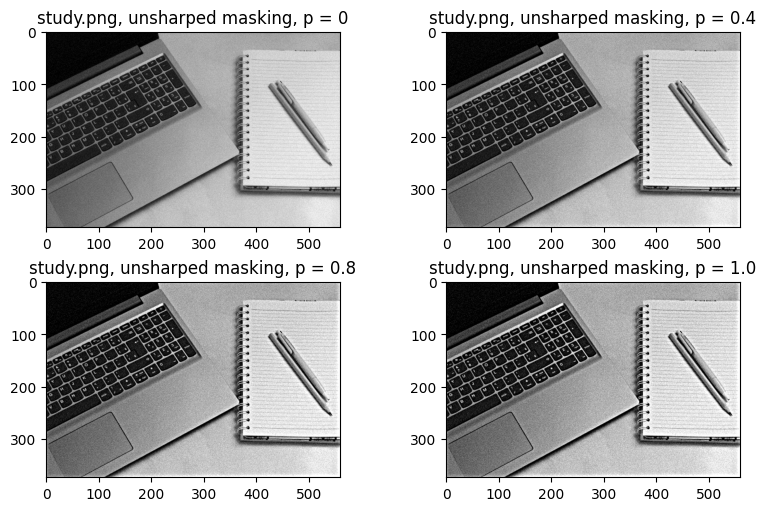

In [68]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots(nrows=2, ncols=2, constrained_layout= True, figsize=(8,5))

for i in range(len(p)):
    x= i//2
    y= i%2
    ax[x,y].imshow(I_sharps[i],cmap='gray')
    ax[x,y].set_title(f'study.png, unsharped masking, p = {p[i]}')

plt.show()

### 3.2 Laplacian Sharpening